First try with random predictions

Imports

In [2]:
import numpy as np
import pandas as pd
import torch
from torchvision import datasets, transforms
import torchvision.models as models
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

Choose a model

In [3]:
model_name = 'resnet18'
print(f'Using model: {model_name}')

Using model: resnet18


Load and prepare the dataset

In [4]:
image_height = 64
image_width = 64
batch_size = 1000

# Define transformations for preprocessing
transform = transforms.Compose([
    transforms.Resize((image_height, image_width)),  # Resize images to a fixed size
    transforms.ToTensor(),                           # Convert images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5],      # Normalize pixel values
                         std=[0.5, 0.5, 0.5])])

# Specify the path to your dataset
data_dir = 'fonts'

# Load the dataset using ImageFolder
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Create a DataLoader to handle batching and shuffling
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Calculate the size of the dataset
num_images = len(dataset)
num_batches = len(data_loader)
print(f'Number of images: {num_images}')
print(f'Number of batches: {num_batches}')

# Get the class names
class_names = dataset.classes
print(f'Class names: {class_names}')

Number of images: 15000
Number of batches: 15
Class names: ['Algerian', 'Arial', 'Baskerville', 'Calibry', 'Calligraphy', 'Cambria', 'Comic Sans MS', 'Courier', 'Elephant', 'Fascinate', 'Georgia', 'Helvetica', 'Lucida Bright', 'Nasalization', 'Times New Roman']


Load the model

In [5]:
# Load the model
model = models.__dict__[model_name](weights=None)
model.eval()

# Print the model architecture
# print(model)

if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")
    
# Is MPS even available? macOS 12.3+
print(torch.backends.mps.is_available())

# Was the current version of PyTorch built with MPS activated?
print(torch.backends.mps.is_built())

# Move the model to the GPU
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model = model.to(device)
print(f'Moving the model to {device}')

# Print the model's state_dict
# print('Model state_dict:')
# for param_tensor in model.state_dict():
    # print(param_tensor, '\t', model.state_dict()[param_tensor].size())

tensor([1.], device='mps:0')
True
True
Moving the model to mps


Train and evaluate the model

Class names: 15
Extracting true labels from dataset
True labels: 15000
Predicted labels: 15000
Accuracy: 6.27%
Precision: 6.27
Recall: 6.27
F1 Score: 6.27
Confusion Matrix:


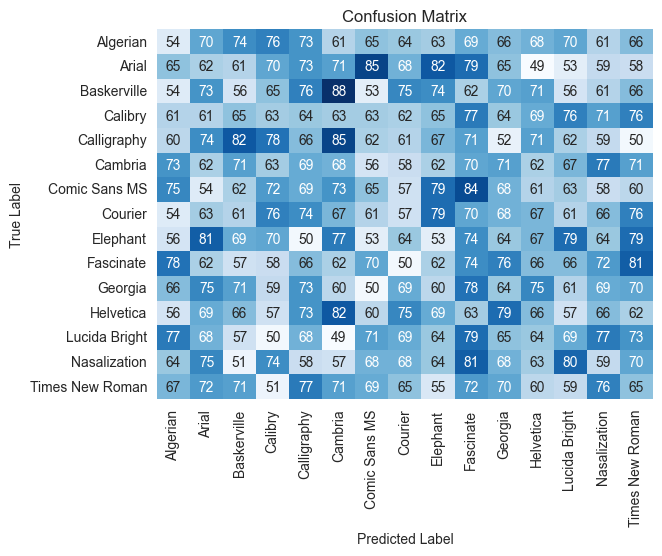

In [65]:
# Function to extract true labels from directory structure
def extract_true_labels(dataset):
    print(f'Extracting true labels from dataset')
    true_labels = []
    for _, label in dataset:
        true_labels.append(label)
    return true_labels

# Generate random labels for the dataset
print(f'Class names: {len(class_names)}')
true_labels = extract_true_labels(dataset)
print(f'True labels: {len(true_labels)}')
predicted_labels = np.random.randint(0, len(class_names), (num_images,))
print(f'Predicted labels: {len(predicted_labels)}')

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')
precision = precision_score(true_labels, predicted_labels, average='micro')
print(f'Precision: {precision * 100:.2f}')
recall = recall_score(true_labels, predicted_labels, average='micro')
print(f'Recall: {recall * 100:.2f}')
f1 = f1_score(true_labels, predicted_labels, average='micro')
print(f'F1 Score: {f1 * 100:.2f}')
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print(f'Confusion Matrix:')
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()